In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

url = './data/VN30_price.csv'
df = pd.read_csv(url)

2023-06-17 05:07:40.810623: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 05:07:46.302095: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 05:07:46.345901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 05:07:53.437765: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Preprocess the data
data = df['VN30'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [3]:
# Create the input and output sequences for the LSTM model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length - 1):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)
seq_length = 10
x, y = create_sequences(data, seq_length)


In [4]:
split_idx = int(len(x))-300
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [5]:
x.shape

(1399, 100)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [7]:
model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, validation_split=0.25, epochs=50, batch_size=32)

Epoch 1/50


2023-06-17 05:08:11.991085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-17 05:08:11.994458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-17 05:08:11.997790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

27/27 [==============================] - ETA: 0s - loss: 0.0180

2023-06-17 05:08:18.592887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-17 05:08:18.595890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-17 05:08:18.597917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

27/27 [==============================] - 8s 77ms/step - loss: 0.0180 - val_loss: 0.0490
Epoch 2/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0020 - val_loss: 0.0159
Epoch 3/50
27/27 [==============================] - 1s 49ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 4/50
27/27 [==============================] - 1s 52ms/step - loss: 8.6799e-04 - val_loss: 0.0017
Epoch 5/50
27/27 [==============================] - 1s 48ms/step - loss: 7.9197e-04 - val_loss: 0.0018
Epoch 6/50
27/27 [==============================] - 1s 48ms/step - loss: 7.8222e-04 - val_loss: 0.0016
Epoch 7/50
27/27 [==============================] - 1s 47ms/step - loss: 7.5413e-04 - val_loss: 0.0015
Epoch 8/50
27/27 [==============================] - 2s 66ms/step - loss: 7.0656e-04 - val_loss: 0.0016
Epoch 9/50
27/27 [==============================] - 2s 62ms/step - loss: 7.0570e-04 - val_loss: 0.0015
Epoch 10/50
27/27 [==============================] - 2s 57ms/step - loss: 7.0200e-04 - val_loss:

In [8]:
y_test.shape

(280,)

In [9]:
x_test.shape

(280, 100, 1)

In [10]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
y_true = scaler.inverse_transform([y_test])



rmse = np.sqrt(np.mean(((predictions - y_true) ** 2)))
print('RMSE: %.2f' % rmse)

mae = np.mean(np.abs(predictions - y_true))
print('MAE: %.2f' % mae)

mape = np.mean(np.abs((predictions - y_true) / y_true)) * 100
print('MAPE: %.2f%%' % mape)


1/9 [==>...........................] - ETA: 4s

2023-06-17 05:09:26.133858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-17 05:09:26.136737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-17 05:09:26.138951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 1s 14ms/step
RMSE: 270.86
MAE: 216.87
MAPE: 17.41%


In [11]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # ME 
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

def adjust(val, length= 6): return str(val).ljust(length)

In [12]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(predictions.flatten(), y_true.flatten())
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0156
me     :  1.9028
mae    :  19.3372
mpe    :  0.002
rmse   :  25.178
corr   :  0.9915
minmax :  0.0153


In [15]:
lstnet = [1489.1891 , 1489.9209 , 1479.7115 , 1484.6711 , 1518.9275 ,
       1531.5386 , 1534.3811 , 1519.059  , 1523.3647 , 1531.6377 ,
       1530.171  , 1533.768  , 1535.9471 , 1529.0879 , 1525.5172 ,
       1516.9539 , 1530.0531 , 1530.6272 , 1518.8871 , 1521.2249 ,
       1505.7944 , 1500.3943 , 1518.1404 , 1536.8042 , 1566.9656 ,
       1574.8368 , 1569.2803 , 1555.0205 , 1539.8119 , 1550.1525 ,
       1542.0006 , 1504.5367 , 1480.1985 , 1515.0952 , 1519.4019 ,
       1531.4851 , 1522.6985 , 1522.7609 , 1519.6842 , 1520.8893 ,
       1511.8812 , 1513.3171 , 1514.5205 , 1512.5702 , 1506.5314 ,
       1479.73   , 1508.6694 , 1517.695  , 1526.3622 , 1517.7676 ,
       1519.6727 , 1538.4943 , 1561.0635 , 1547.5754 , 1544.239  ,
       1534.8345 , 1515.5332 , 1500.9238 , 1532.019  , 1528.348  ,
       1523.8181 , 1480.8818 , 1479.301  , 1485.0746 , 1493.9312 ,
       1505.0128 , 1471.9341 , 1517.6562 , 1528.9657 , 1518.5115 ,
       1534.6337 , 1543.9667 , 1551.7975 , 1553.1661 , 1553.427  ,
       1544.342  , 1505.352  , 1529.1742 , 1523.5966 , 1542.1085 ,
       1532.6995 , 1535.5732 , 1535.2808 , 1540.1277 , 1524.506  ,
       1525.3286 , 1521.9226 , 1520.2483 , 1498.238  , 1526.0885 ,
       1528.2317 , 1510.0376 , 1491.981  , 1492.5876 , 1492.5925 ,
       1476.8954 , 1463.3011 , 1469.9302 , 1474.0615 , 1472.1409 ,
       1478.6678 , 1506.9875 , 1515.4663 , 1506.735  , 1499.4818 ,
       1500.6268 , 1484.2766 , 1500.4623 , 1503.124  , 1509.8677 ,
       1543.3958 , 1551.667  , 1541.7029 , 1559.0621 , 1544.1754 ,
       1523.493  , 1508.4728 , 1526.872  , 1517.3737 , 1494.2498 ,
       1470.7972 , 1442.1255 , 1437.6945 , 1429.9005 , 1447.0518 ,
       1367.0369 , 1397.2953 , 1406.2319 , 1402.0256 , 1420.9833 ,
       1390.9496 , 1407.1449 , 1375.3143 , 1316.5417 , 1343.697  ,
       1353.181  , 1280.6215 , 1219.7299 , 1220.0232 , 1282.6135 ,
       1288.7194 , 1285.4624 , 1285.6565 , 1257.5941 , 1272.2333 ,
       1315.4207 , 1312.3607 , 1331.4918 , 1345.5503 , 1334.1147 ,
       1338.5726 , 1327.5632 , 1325.1063 , 1330.836  , 1326.9309 ,
       1339.8196 , 1344.3625 , 1328.1937 , 1260.7137 , 1260.2953 ,
       1256.0994 , 1283.1844 , 1258.5493 , 1226.5792 , 1227.1796 ,
       1228.2125 , 1245.9174 , 1237.7173 , 1259.0548 , 1276.1986 ,
       1274.9249 , 1251.2538 , 1252.4768 , 1250.1615 , 1242.2218 ,
       1214.1915 , 1229.8236 , 1233.3687 , 1210.03   , 1221.0797 ,
       1220.0686 , 1223.2556 , 1220.6335 , 1218.0417 , 1212.658  ,
       1225.687  , 1237.297  , 1229.9153 , 1225.7084 , 1219.5483 ,
       1220.9512 , 1239.2188 , 1234.6381 , 1256.3934 , 1267.5453 ,
       1273.2617 , 1279.0923 , 1272.7388 , 1279.2627 , 1282.0974 ,
       1278.6622 , 1273.116  , 1281.9578 , 1296.1635 , 1296.9124 ,
       1302.8413 , 1301.8351 , 1297.1097 , 1286.8942 , 1293.7212 ,
       1298.0211 , 1312.0044 , 1309.3463 , 1294.7499 , 1300.0922 ,
       1304.7278 , 1299.7623 , 1300.593  , 1271.1201 , 1265.512  ,
       1277.5688 , 1278.5742 , 1273.385  , 1262.3932 , 1265.5779 ,
       1254.9232 , 1231.7634 , 1242.4039 , 1229.9187 , 1229.8564 ,
       1217.0432 , 1189.0468 , 1183.3081 , 1163.2368 , 1148.9897 ,
       1153.0746 , 1104.7509 , 1096.7842 , 1120.5093 , 1085.0856 ,
       1037.6089 , 1041.0778 , 1005.02167, 1035.1018 , 1055.262  ,
       1062.9963 , 1048.4607 , 1061.5306 , 1057.3153 , 1053.6561 ,
       1012.1806 ,  972.4985 ,  991.06445,  992.6584 , 1030.1068 ,
       1029.7168 , 1030.1724 , 1042.5576 , 1025.7408 , 1026.7706 ,
        998.2351 ,  971.10583,  978.86774,  981.7917 ,  936.54535,
        949.3909 ,  941.82697,  906.41815,  943.15424,  975.44324,
        972.3769 ,  957.1485 ,  947.2559 ,  939.92706,  941.27576,
        970.0068 , 1006.738  , 1031.1204 , 1051.8977 , 1044.7957 ,
       1095.2805 , 1115.9391 , 1052.6404 , 1044.296  , 1066.9907 ,
       1064.9368 , 1032.9884 , 1060.6434 , 1059.4702 , 1067.8638 ,
       1069.39   , 1053.5315 , 1031.2455 , 1032.7078 , 1040.5038 ,
       1034.7623 ,  989.1772 , 1007.7476 , 1017.0591 , 1013.79126]

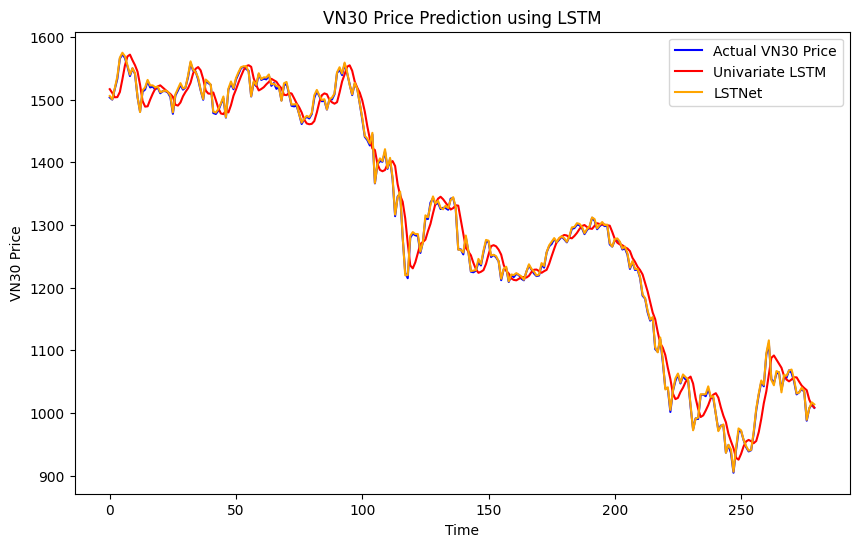

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, y_true.shape[1]), y_true.flatten(), color='blue', label='Actual VN30 Price')
plt.plot(np.arange(0, len(predictions)), predictions.flatten(), color='red', label='Univariate LSTM')
plt.plot(lstnet[-280:], label="LSTNet", color='orange')
plt.title('VN30 Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('VN30 Price')
plt.legend()
plt.show()

In [14]:
len(y_true)

1